# Lezione 2019-03-14 \ 03

## Metodo della massima verosimiglianza

2019-03-14 - Matteo Franzoi

---

In [2]:
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
import numpy as np

In [3]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
os.getcwd()

'/media/Dati/jupyter/lezioni'

In [5]:
pd.set_option("display.max_rows", 10)
data = pd.read_csv('PluviometriaPaperopoli_4.txt')
map(datetime,data['anno'])
data=data.set_index('anno')
data

,1h,3h,6h,12h,24h
anno,,,,,
1925,50.0,NaN,NaN,NaN,NaN
1928,35.0,47.0,50.0,50.4,67.6
1929,35.4,36.4,36.4,49.6,74.0
1930,67.2,68.2,80.8,102.2,106.8
1931,25.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1984,61.2,61.4,61.4,62.6,81.8
1985,23.6,35.6,44.2,58.6,69.8
1986,20.2,36.8,51.4,55.8,74.4


Il metodo della massima verosimiglianza calcola i valori di **a, b** che massimizzano la probabilità congiunta di ottenere una serie di dati **$\{h_1,\dots,h_n\}$**

Fit calcola i valori migliori. I valori per la durata di 1h

In [6]:
samp = data["1h"]
param1h = gumbel_r.fit(samp) # distribution fitting
param1h

(31.590419540406916, 9.073159872562702)

Per 3h

In [7]:
samp = data["3h"].dropna()
param3h = gumbel_r.fit(samp) # distribution fitting
param3h

(39.527315031968776, 10.041455675185944)

Per 6h

In [8]:
samp = data["6h"].dropna()
param6h = gumbel_r.fit(samp) # distribution fitting
param6h

(48.10031586110712, 12.398915217787547)

Per 12h

In [9]:
samp = data["12h"].dropna()
param12h = gumbel_r.fit(samp) # distribution fitting
param12h

(60.56210349413809, 18.00547079074323)

E infine per 24h

In [10]:
samp = data["24h"].dropna()
param24h = gumbel_r.fit(samp) # distribution fitting
param24h

(75.84889084951226, 22.435147604228796)

Creiamo un dataframe che contiene tutti i dati dove le colonne sono **a** e **b** e le righe sono le durate. Prendo poi la trasposta

In [11]:
abs_mle=pd.DataFrame([param1h,param3h,param6h,param12h,param24h],
                     columns=["a","b"],
                     index=["1h","3h","6h","12h","24h"]).T
abs_mle

,1h,3h,6h,12h,24h
a,31.59042,39.527315,48.100316,60.562103,75.848891
b,9.07316,10.041456,12.398915,18.005471,22.435148


In [12]:
abs_mle.to_pickle('abs_mle')

In [16]:
os.listdir()

['.ipynb_checkpoints',
 '0-Eschfaeller-Python-Lectures.ipynb',
 '2-Reading a file with pandas.ipynb',
 '3.1 - Gumbel-Momenti.ipynb',
 '3.2 - Gumbel - Massima Verosimiglianza.ipynb',
 '3.3 - Gumbel-MinimiQuadrati.ipynb',
 'abs_m',
 'abs_mle',
 'Gaussian distribution.ipynb',
 'lezione20190307_01.ipynb',
 'lezione20190307_02.ipynb',
 'lezione20190311_01.ipynb',
 'lezione20190311_02.ipynb',
 'lezione20190314_01.ipynb',
 'lezione20190314_02.ipynb',
 'lezione20190314_03.ipynb',
 'PluviometriaPaperopoli_4.txt',
 'VotiCostruzioniIdrauliche2017.ipynb',
 'VotiCostruzioniIdrauliche2017.xlsx']

In [18]:
data.min()

1h     19.6
3h     23.6
6h     31.0
12h    38.2
24h    48.2
dtype: float64

In [20]:
data.min()['1h']

19.6

In [21]:
data.max()

1h      89.2
3h     102.0
6h     102.0
12h    129.6
24h    169.4
dtype: float64

In [22]:
data.max()['24h']

169.4

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

In [24]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))

In [25]:
t_rain = np.linspace(data.min()['1h'], data.max()['24h'], 100)

In [50]:
gb = pd.DataFrame([
    gumbel(t_rain, abs_mle, '1h'),
    gumbel(t_rain, abs_mle, '3h'),
    gumbel(t_rain, abs_mle, '6h'),
    gumbel(t_rain, abs_mle, '12h'),
    gumbel(t_rain, abs_mle, '24h')]).T
#********************************************
gb.index = t_rain
gb.columns = ['1h', '3h', '6h', '12h', '24h']
gb

,1h,3h,6h,12h,24h
19.600000,0.023538,0.000692,0.000047,0.000060,0.000005
21.113131,0.041867,0.001916,0.000148,0.000131,0.000010
22.626263,0.068165,0.004597,0.000408,0.000268,0.000022
24.139394,0.102976,0.009760,0.001001,0.000521,0.000044
25.652525,0.146011,0.018651,0.002213,0.000958,0.000085
...,...,...,...,...,...
163.347475,1.000000,0.999996,0.999908,0.996688,0.979963
164.860606,1.000000,0.999996,0.999919,0.996955,0.981257
166.373737,1.000000,0.999997,0.999928,0.997200,0.982469
167.886869,1.000000,0.999997,0.999936,0.997425,0.983603


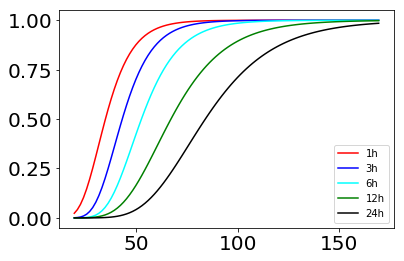

In [40]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
ax = gb.plot(color=['red', 'blue', 'cyan', 'green', 'black'])

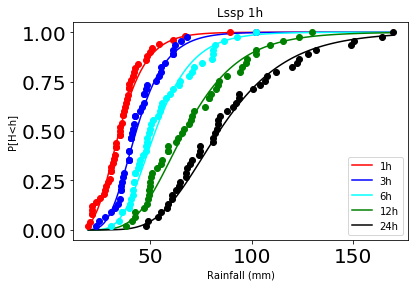

In [42]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
#********************************
ax=gb.plot(color=["red","blue","cyan","green","black"])
#1h
ecdf1h = ECDF(data["1h"])
ax.plot(data["1h"],ecdf1h(data["1h"]),'o',c="red",label="1h")
#3h
data3h=data["3h"].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h,ecdf3h(data3h),"o",c="blue",label="3h")
#6h
data6h=data["6h"].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h,ecdf6h(data6h),"o",c="cyan")
#12h
data12h=data["12h"].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h,ecdf12h(data12h),"o",c="green")
#24h
data24h=data["24h"].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h,ecdf24h(data24h),"o",c="black")
#**********************************
ax.set_title('Lssp 1h')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')
plt.show()